In [37]:
import numpy as np, matplotlib.pyplot as plt, cv2
from tensorflow.keras.models import load_model
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
numImages = 25 #@param {type:"integer"}

1/1 [==============================] - 0s 461ms/step
Model Version: 1


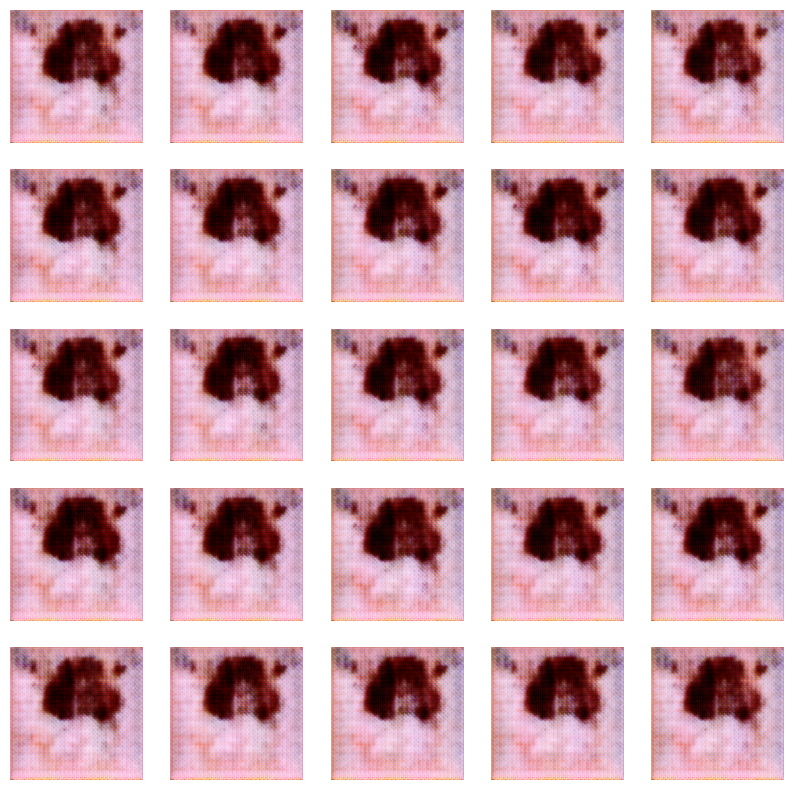

********************************************************************************


1/1 [==============================] - 1s 575ms/step
Model Version: 2


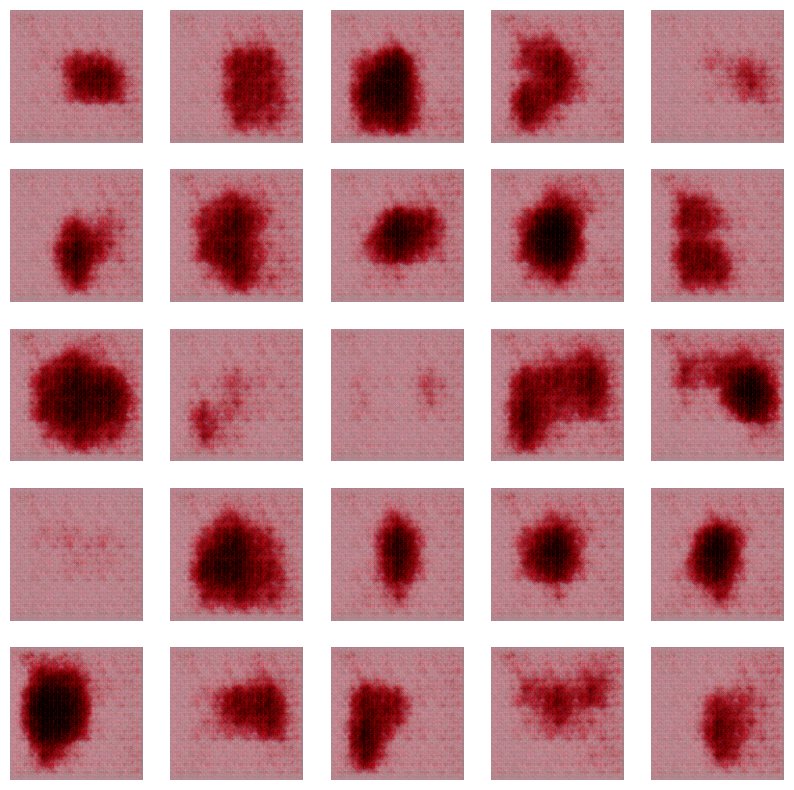

********************************************************************************


1/1 [==============================] - 0s 416ms/step
Model Version: 3


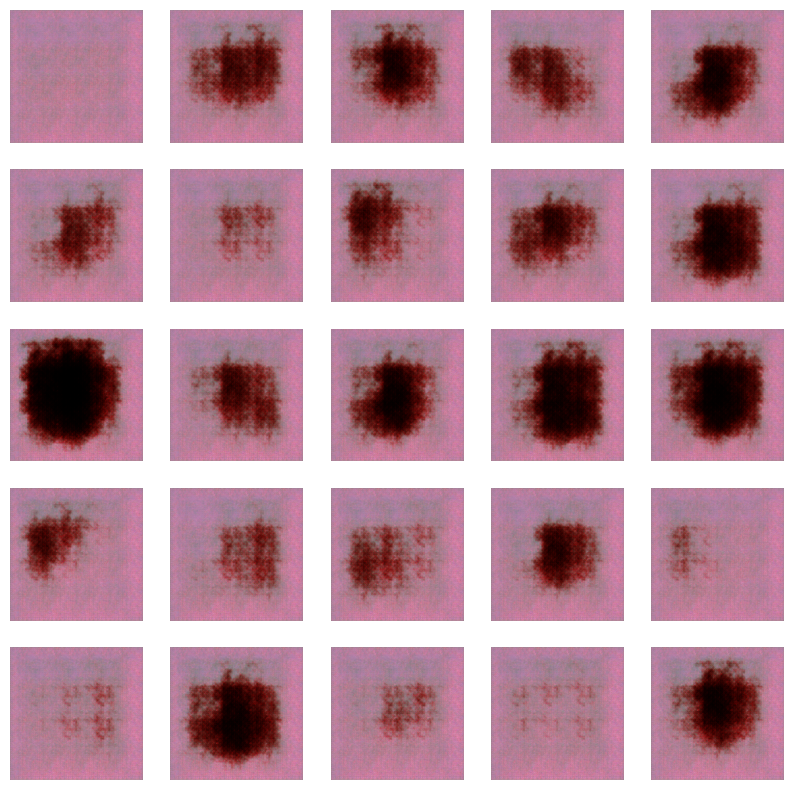

********************************************************************************


1/1 [==============================] - 0s 442ms/step
Model Version: 4


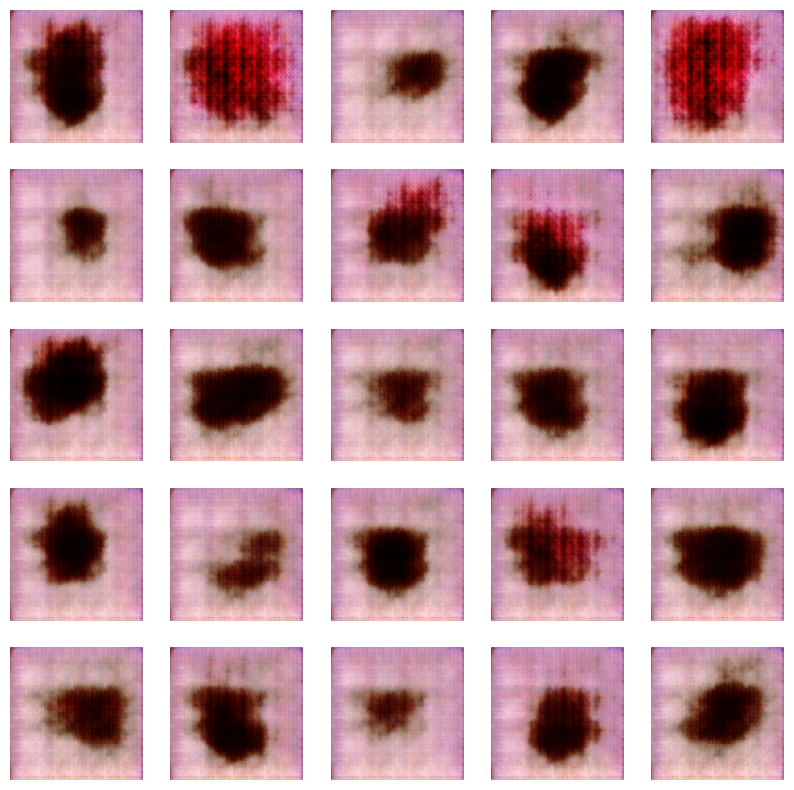

********************************************************************************


1/1 [==============================] - 1s 804ms/step
Model Version: 5


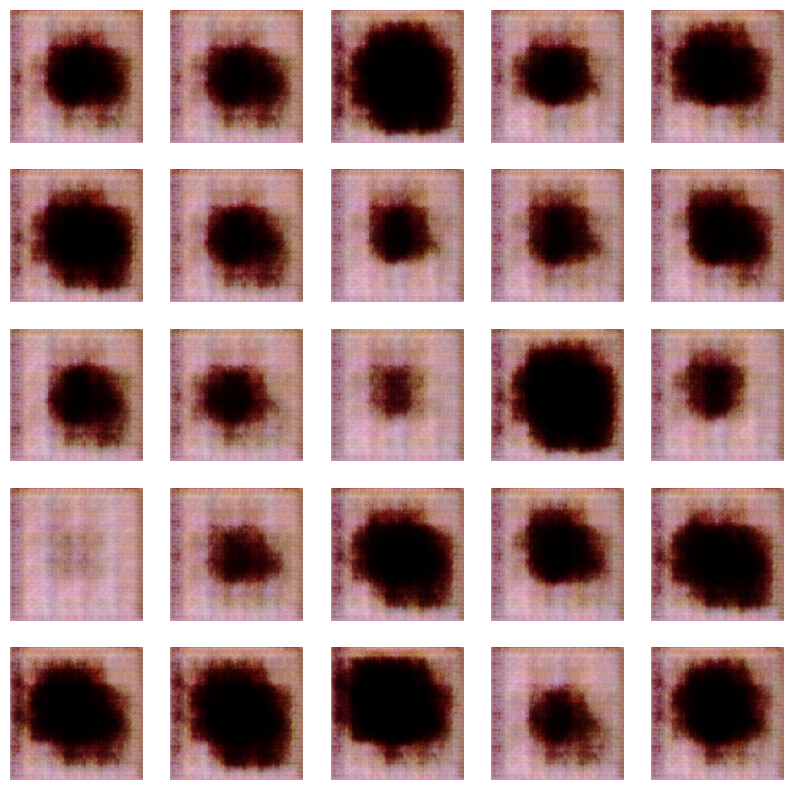

********************************************************************************


1/1 [==============================] - 0s 431ms/step
Model Version: 6


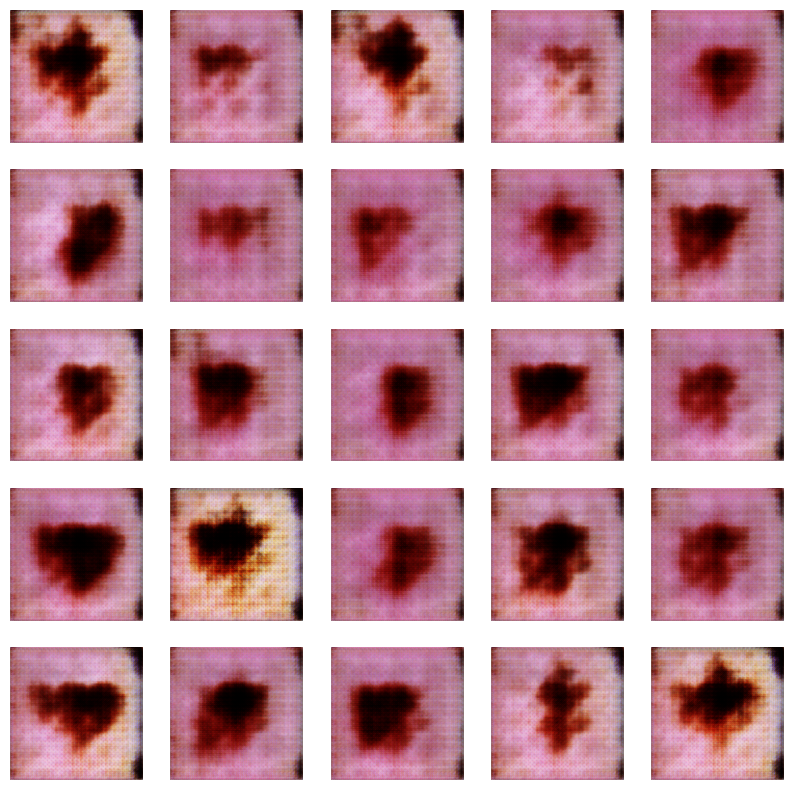

********************************************************************************


In [39]:
for modelVersion in range(6):
  generatorModel = load_model(''.join(['/content/gdrive/MyDrive/tcc/testes/generatorV',str(modelVersion+1),'.h5']))

  noise = np.random.normal(0, 1, (numImages, 1, 1, 100))

  generatedImages = generatorModel.predict(noise)

  print(f"Model Version: {modelVersion+1}")
  plt.figure(figsize=(10, 10))
  for i in range(numImages):
      plt.subplot(int(numImages ** 0.5), int(numImages ** 0.5), i + 1)
      plt.imshow(generatedImages[i] * 0.5 + 0.5)  # If images are in the range [-1, 1], map them to [0, 1] for display
      plt.axis('off')
  plt.show()
  print('********************************************************************************')

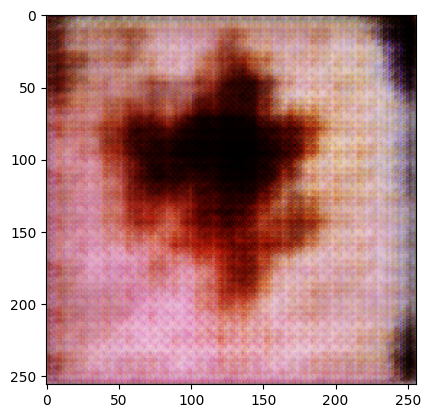

In [40]:
plt.imshow(generatedImages[0]*.5+.5)

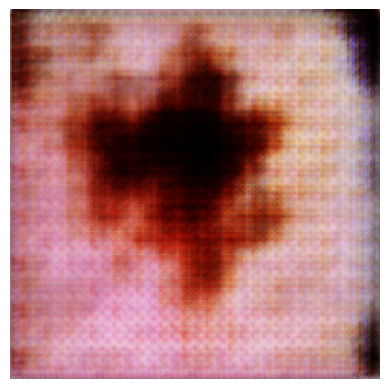

(224, 224, 3)


In [41]:
imgs = []
h,w = 224,224
for i in range(numImages):
  img = cv2.resize(generatedImages[i], (h, w))
  imgs.append(img*0.5+0.5)

plt.imshow(imgs[0])
plt.axis('off')
plt.show()
print(imgs[0].shape)